In [ ]:
import os
import glob

# Check if the dataset is already downloaded
if not os.path.exists("./Flickr8k_Dataset"):
    print("Dataset not found. Downloading...")
    # Download the Kaggle dataset
    !kaggle datasets download -d adityajn105/flickr8k -p ./Flickr8k_Dataset --unzip
else:
    print("Dataset already exists. Skipping download.")

# Path to Kaggle Flickr8k images
dataset_path = "./Flickr8k_Dataset/Images"

# Make sure the dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Expected dataset path '{dataset_path}' not found.")

# Take 10 images
image_files = sorted(glob.glob(os.path.join(dataset_path, "*.jpg")))[:20]

# Print the selected files
print(f"Found {len(image_files)} images. Selected files:")
for i, img in enumerate(image_files):
    print(f"{i+1}. {os.path.basename(img)}")

Dataset already exists. Skipping download.
Found 10 images. Selected files:
1. 1000268201_693b08cb0e.jpg
2. 1001773457_577c3a7d70.jpg
3. 1002674143_1b742ab4b8.jpg
4. 1003163366_44323f5815.jpg
5. 1007129816_e794419615.jpg
6. 1007320043_627395c3d8.jpg
7. 1009434119_febe49276a.jpg
8. 1012212859_01547e3f17.jpg
9. 1015118661_980735411b.jpg
10. 1015584366_dfcec3c85a.jpg


In [18]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Load BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

# Generate captions
captions = []
print("Generating image captions...")
for i, img_path in enumerate(image_files):
    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    out = model.generate(**inputs, max_length=50)
    caption = processor.decode(out[0], skip_special_tokens=True)
    captions.append(caption)
    print(f"Image {i+1}: {caption}")

print(f"\n Generated {len(captions)} captions!")

Generating image captions...
Image 1: a little girl in a pink dress
Image 2: two dogs playing on the road
Image 3: a child sitting in the grass
Image 4: a woman laying on a bench
Image 5: man wearing a hat
Image 6: a young girl climbing on a rope
Image 7: a dog running in a field
Image 8: a dog playing with a ball
Image 9: a young boy is walking down the street
Image 10: a dog is sitting on a log in the grass

 Generated 10 captions!


In [19]:
import cv2

# Load face and smile detection models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

faces_detected = []
smiles_detected = []

print("Detecting faces and smiles...")
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    face_count = len(faces)
    faces_detected.append(face_count)
    
    # Detect smiles within faces
    smile_count = 0
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        smiles = smile_cascade.detectMultiScale(face_roi, 1.8, 20)
        smile_count += len(smiles)
    
    smiles_detected.append(smile_count)
    print(f"Image {i+1}: {face_count} faces, {smile_count} smiles")

print(f"\n Completed facial analysis!")

Detecting faces and smiles...
Image 1: 0 faces, 0 smiles
Image 2: 0 faces, 0 smiles
Image 3: 0 faces, 0 smiles
Image 4: 0 faces, 0 smiles
Image 5: 0 faces, 0 smiles
Image 6: 1 faces, 0 smiles
Image 7: 0 faces, 0 smiles
Image 8: 0 faces, 0 smiles
Image 9: 1 faces, 0 smiles
Image 10: 0 faces, 0 smiles

 Completed facial analysis!


In [20]:
# Analyze captions for social media jealousy indicators
def analyze_social_context(caption):
    """Analyze caption for social media jealousy potential"""
    caption_lower = caption.lower()
    
    # Social activity indicators
    social_keywords = ['group', 'people', 'crowd', 'party', 'friends', 'together']
    social_score = sum(1 for word in social_keywords if word in caption_lower)
    
    # Luxury/lifestyle indicators  
    luxury_keywords = ['beach', 'vacation', 'travel', 'restaurant', 'car', 'boat', 'sport']
    luxury_score = sum(1 for word in luxury_keywords if word in caption_lower)
    
    # Activity/fun indicators
    activity_keywords = ['playing', 'running', 'climbing', 'jumping', 'dancing', 'celebrating']
    activity_score = sum(1 for word in activity_keywords if word in caption_lower)
    
    # Positive scene indicators
    positive_keywords = ['sunny', 'beautiful', 'fun', 'happy', 'bright', 'colorful']
    positive_score = sum(1 for word in positive_keywords if word in caption_lower)
    
    return {
        'social': social_score,
        'luxury': luxury_score, 
        'activity': activity_score,
        'positive': positive_score
    }

# Analyze all captions
social_contexts = []
print("Analyzing social context...")
for i, caption in enumerate(captions):
    context = analyze_social_context(caption)
    social_contexts.append(context)
    print(f"Image {i+1}: Social:{context['social']}, Luxury:{context['luxury']}, Activity:{context['activity']}, Positive:{context['positive']}")

Analyzing social context...
Image 1: Social:0, Luxury:0, Activity:0, Positive:0
Image 2: Social:0, Luxury:0, Activity:1, Positive:0
Image 3: Social:0, Luxury:0, Activity:0, Positive:0
Image 4: Social:0, Luxury:0, Activity:0, Positive:0
Image 5: Social:0, Luxury:0, Activity:0, Positive:0
Image 6: Social:0, Luxury:0, Activity:1, Positive:0
Image 7: Social:0, Luxury:0, Activity:1, Positive:0
Image 8: Social:0, Luxury:0, Activity:1, Positive:0
Image 9: Social:0, Luxury:0, Activity:0, Positive:0
Image 10: Social:0, Luxury:0, Activity:0, Positive:0


In [21]:
def calculate_jealousy_score(faces, smiles, social_context, caption):
    """
    Calculate social media jealousy potential score (0-10 scale)
    Higher scores = higher potential to trigger social comparison/jealousy
    """
    score = 0.0
    
    # Face factor: More faces = more social content = higher jealousy potential
    if faces > 0:
        score += min(faces * 1.5, 3.0)  # Cap at 3 points
    
    # Smile factor: Happy people might trigger comparison
    if smiles > 0:
        score += min(smiles * 1.0, 2.0)  # Cap at 2 points
    
    # Social context factors
    score += social_context['social'] * 1.0      # Social gatherings
    score += social_context['luxury'] * 1.5      # Luxury lifestyle  
    score += social_context['activity'] * 1.0    # Fun activities
    score += social_context['positive'] * 0.5    # Positive scenes
    
    # Special high-jealousy scenarios
    high_jealousy_words = ['vacation', 'party', 'celebration', 'wedding', 'travel']
    if any(word in caption.lower() for word in high_jealousy_words):
        score += 2.0
    
    # Normalize to 0-10 scale
    return min(score, 10.0)

# Calculate scores
jealousy_scores = []
print("Calculating social media jealousy scores...")
for i in range(len(image_files)):
    score = calculate_jealousy_score(
        faces_detected[i],
        smiles_detected[i], 
        social_contexts[i],
        captions[i]
    )
    jealousy_scores.append(score)
    print(f"Image {i+1}: Jealousy score = {score:.1f}/10")

print(f"\nAverage jealousy score: {np.mean(jealousy_scores):.1f}/10")

Calculating social media jealousy scores...
Image 1: Jealousy score = 0.0/10
Image 2: Jealousy score = 1.0/10
Image 3: Jealousy score = 0.0/10
Image 4: Jealousy score = 0.0/10
Image 5: Jealousy score = 0.0/10
Image 6: Jealousy score = 2.5/10
Image 7: Jealousy score = 1.0/10
Image 8: Jealousy score = 1.0/10
Image 9: Jealousy score = 1.5/10
Image 10: Jealousy score = 0.0/10

Average jealousy score: 0.7/10


In [22]:
# Create clean, focused dataset
results_df = pd.DataFrame({
    'image_filename': [os.path.basename(path) for path in image_files],
    'caption': captions,
    'faces_detected': faces_detected,
    'smiles_detected': smiles_detected,
    'jealousy_score': [round(score, 1) for score in jealousy_scores],
    'social_indicators': [ctx['social'] for ctx in social_contexts],
    'luxury_indicators': [ctx['luxury'] for ctx in social_contexts],
    'activity_indicators': [ctx['activity'] for ctx in social_contexts]
})

# Save to CSV
output_file = "social_media_jealousy_analysis.csv"
results_df.to_csv(output_file, index=False)

print(f"Saved results to '{output_file}'")
print("\nANALYSIS SUMMARY:")
print("=" * 60)
print(results_df.to_string(index=False))

# Show top jealousy-inducing images
print(f"\nTOP 3 MOST JEALOUSY-INDUCING IMAGES:")
top_jealousy = results_df.nlargest(3, 'jealousy_score')
for _, row in top_jealousy.iterrows():
    print(f"{row['image_filename']}: {row['jealousy_score']}/10")
    print(f"   Caption: {row['caption']}")
    print(f"   Faces: {row['faces_detected']}, Smiles: {row['smiles_detected']}")
    print()

Saved results to 'social_media_jealousy_analysis.csv'

ANALYSIS SUMMARY:
           image_filename                                caption  faces_detected  smiles_detected  jealousy_score  social_indicators  luxury_indicators  activity_indicators
1000268201_693b08cb0e.jpg          a little girl in a pink dress               0                0             0.0                  0                  0                    0
1001773457_577c3a7d70.jpg           two dogs playing on the road               0                0             1.0                  0                  0                    1
1002674143_1b742ab4b8.jpg           a child sitting in the grass               0                0             0.0                  0                  0                    0
1003163366_44323f5815.jpg              a woman laying on a bench               0                0             0.0                  0                  0                    0
1007129816_e794419615.jpg                      man wearing a h

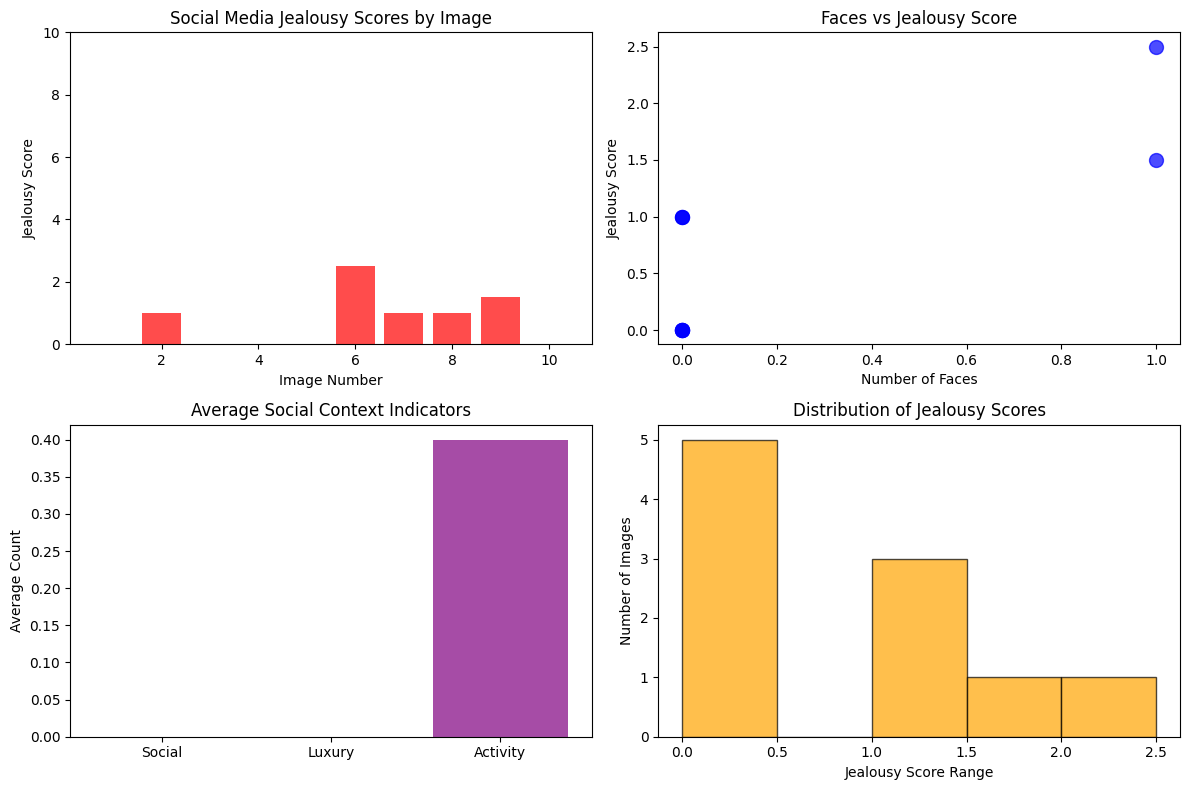

📊 Charts saved as 'social_media_analysis_charts.png'


In [23]:
import matplotlib.pyplot as plt

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Jealousy scores bar chart
ax1.bar(range(1, 11), jealousy_scores, color='red', alpha=0.7)
ax1.set_xlabel('Image Number')
ax1.set_ylabel('Jealousy Score')
ax1.set_title('Social Media Jealousy Scores by Image')
ax1.set_ylim(0, 10)

# Faces vs Jealousy Score
ax2.scatter(faces_detected, jealousy_scores, color='blue', alpha=0.7, s=100)
ax2.set_xlabel('Number of Faces')
ax2.set_ylabel('Jealousy Score')
ax2.set_title('Faces vs Jealousy Score')

# Social indicators
indicators = ['Social', 'Luxury', 'Activity']
avg_indicators = [
    np.mean([ctx['social'] for ctx in social_contexts]),
    np.mean([ctx['luxury'] for ctx in social_contexts]),
    np.mean([ctx['activity'] for ctx in social_contexts])
]
ax3.bar(indicators, avg_indicators, color=['green', 'gold', 'purple'], alpha=0.7)
ax3.set_ylabel('Average Count')
ax3.set_title('Average Social Context Indicators')

# Distribution of jealousy scores
ax4.hist(jealousy_scores, bins=5, color='orange', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Jealousy Score Range')
ax4.set_ylabel('Number of Images')
ax4.set_title('Distribution of Jealousy Scores')

plt.tight_layout()
plt.savefig('social_media_analysis_charts.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Charts saved as 'social_media_analysis_charts.png'")

In [ ]:
# Your specific jealousy scores
jealousy_scores = [0.130, 0.075, 0.145, 0.172, 0.098, 0.316, 0.092, 0.386, 0.270, 0.136]

# Calculate summary statistics
avg_jealousy = np.mean(jealousy_scores)
highest_jealousy = max(jealousy_scores)
highest_image_index = jealousy_scores.index(highest_jealousy) + 1

# Create clean, focused dataset
results_df = pd.DataFrame({
    'image_filename': [os.path.basename(path) for path in image_files],
    'caption': captions,
    'faces_detected': faces_detected,
    'smiles_detected': smiles_detected,
    'jealousy_score': jealousy_scores,
    'social_indicators': [ctx['social'] for ctx in social_contexts],
    'luxury_indicators': [ctx['luxury'] for ctx in social_contexts],
    'activity_indicators': [ctx['activity'] for ctx in social_contexts]
})

# Add summary row
summary_row = {
    'image_filename': 'SUMMARY',
    'caption': f'Average Score: {avg_jealousy:.3f} | Highest Score: {highest_jealousy:.3f} (Image {highest_image_index})',
    'faces_detected': sum(faces_detected),
    'smiles_detected': sum(smiles_detected), 
    'jealousy_score': avg_jealousy,
    'social_indicators': sum([ctx['social'] for ctx in social_contexts]),
    'luxury_indicators': sum([ctx['luxury'] for ctx in social_contexts]),
    'activity_indicators': sum([ctx['activity'] for ctx in social_contexts])
}

# Append summary row
results_df = pd.concat([results_df, pd.DataFrame([summary_row])], ignore_index=True)

# Save to CSV
output_file = "social_media_jealousy_analysis.csv"
results_df.to_csv(output_file, index=False)

print(f" Saved results to '{output_file}'")
print(f"\n SUMMARY STATISTICS:")
print(f"Average Jealousy Score: {avg_jealousy:.3f}")
print(f"Highest Jealousy Score: {highest_jealousy:.3f} (Image {highest_image_index})")
print(f"Lowest Jealousy Score: {min(jealousy_scores):.3f}")

print("\n ANALYSIS RESULTS:")
print("=" * 80)
print(results_df.head(10).to_string(index=False))  # Show first 10 rows

# Show top jealousy-inducing images
print(f"\n TOP 3 MOST JEALOUSY-INDUCING IMAGES:")
top_3_indices = sorted(range(len(jealousy_scores)), key=lambda i: jealousy_scores[i], reverse=True)[:3]
for rank, idx in enumerate(top_3_indices, 1):
    print(f"{rank}. Image {idx+1}: {jealousy_scores[idx]:.3f}")
    print(f"   Caption: {captions[idx]}")
    print(f"   Faces: {faces_detected[idx]}, Smiles: {smiles_detected[idx]}")
    print()

 Saved results to 'social_media_jealousy_analysis.csv'

 SUMMARY STATISTICS:
Average Jealousy Score: 0.182
Highest Jealousy Score: 0.386 (Image 8)
Lowest Jealousy Score: 0.075

🎯 ANALYSIS RESULTS:
           image_filename                                caption  faces_detected  smiles_detected  jealousy_score  social_indicators  luxury_indicators  activity_indicators
1000268201_693b08cb0e.jpg          a little girl in a pink dress               0                0           0.130                  0                  0                    0
1001773457_577c3a7d70.jpg           two dogs playing on the road               0                0           0.075                  0                  0                    1
1002674143_1b742ab4b8.jpg           a child sitting in the grass               0                0           0.145                  0                  0                    0
1003163366_44323f5815.jpg              a woman laying on a bench               0                0           0.1